In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding' 
plt.rcParams['axes.unicode_minus'] = False 

import sys
sys.path.append('../')
from utils.util import get_parent_path

In [ ]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    print(f"{font.name} : {font.fname}")

In [2]:
print(get_parent_path())

/Users/iyongjeong/WORK/dacon/img_clf


In [3]:
data_dir = os.path.join(get_parent_path(), 'data', 'train')

In [14]:
data_dir

'/Users/iyongjeong/WORK/dacon/img_clf/data/train'

In [5]:
folder_ls = os.listdir(data_dir)
folder_ls = sorted(folder_ls)
print(len(folder_ls))

397


In [6]:
folder_ls_fl = [folder for folder in folder_ls if not folder.startswith('.')]

In [7]:
len(folder_ls_fl)

396

In [8]:
# make file list each folder

file_ls = []
for folder in folder_ls_fl:
    folder_path = os.path.join(data_dir, folder)
    file_ls += [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

In [9]:
print(file_ls[:5])

['/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0080.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0057.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0043.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0042.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0056.jpg']


In [10]:
file_ls = sorted(file_ls)

In [11]:
print(file_ls[:5])

['/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0000.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0001.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0002.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0003.jpg', '/Users/iyongjeong/WORK/dacon/img_clf/data/train/1시리즈_F20_2013_2015/1시리즈_F20_2013_2015_0004.jpg']


In [12]:
df = pd.DataFrame(file_ls, columns=['image_path'])
df['image_name'] = df['image_path'].apply(lambda x: os.path.basename(x))
df['folder_name'] = df['image_path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

In [13]:
df['label'] = df['folder_name'].astype('category')

In [21]:
# 중복 클래스 통합 딕셔너리 정의
label_mapping = {
    'K5_하이브리드_3세대_2020_2023': 'K5_3세대_하이브리드_2020_2022',
    '디_올_뉴_니로_2022_2025': '디_올뉴니로_2022_2025',
    '박스터_718_2017_2024': '718_박스터_2017_2024',
    '라브4_4세대_2013_2018': 'RAV4_2016_2018',
    '라브4_5세대_2019_2024': 'RAV4_5세대_2019_2024'
}

df['label'] = df['label'].apply(lambda x: label_mapping.get(x, x))

unique_labels = sorted(df['label'].unique())
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
df['label_index'] = df['label'].map(label_to_index)


print("총 클래스 수:", len(unique_labels))
print(df.head())
df.to_csv('train_mapped.csv', index=False)

총 클래스 수: 391
                                          image_path  \
0  /Users/iyongjeong/WORK/dacon/img_clf/data/trai...   
1  /Users/iyongjeong/WORK/dacon/img_clf/data/trai...   
2  /Users/iyongjeong/WORK/dacon/img_clf/data/trai...   
3  /Users/iyongjeong/WORK/dacon/img_clf/data/trai...   
4  /Users/iyongjeong/WORK/dacon/img_clf/data/trai...   

                    image_name         folder_name               label  \
0  1시리즈_F20_2013_2015_0000.jpg  1시리즈_F20_2013_2015  1시리즈_F20_2013_2015   
1  1시리즈_F20_2013_2015_0001.jpg  1시리즈_F20_2013_2015  1시리즈_F20_2013_2015   
2  1시리즈_F20_2013_2015_0002.jpg  1시리즈_F20_2013_2015  1시리즈_F20_2013_2015   
3  1시리즈_F20_2013_2015_0003.jpg  1시리즈_F20_2013_2015  1시리즈_F20_2013_2015   
4  1시리즈_F20_2013_2015_0004.jpg  1시리즈_F20_2013_2015  1시리즈_F20_2013_2015   

   label_index  
0            0  
1            0  
2            0  
3            0  
4            0  


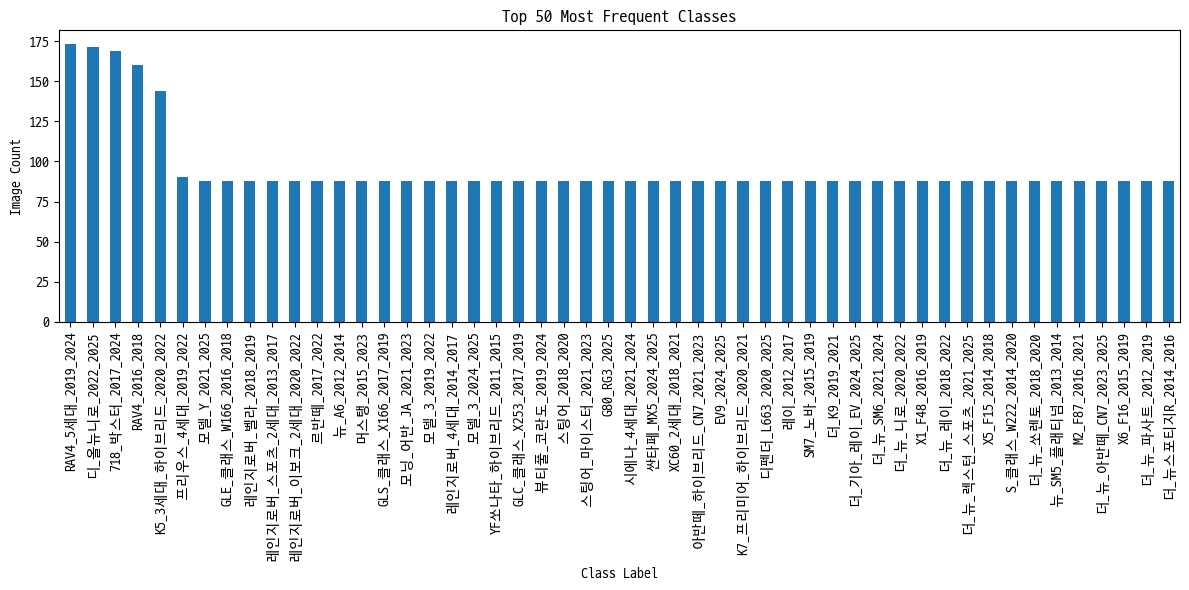

In [28]:
label_counts = df['label'].value_counts()

# 상위/하위 클래스 시각화
top_n = 50
fig, ax = plt.subplots(figsize=(12, 6))
label_counts.head(top_n).plot(kind='bar', ax=ax)
ax.set_title(f'Top {top_n} Most Frequent Classes')
ax.set_ylabel('Image Count')
ax.set_xlabel('Class Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

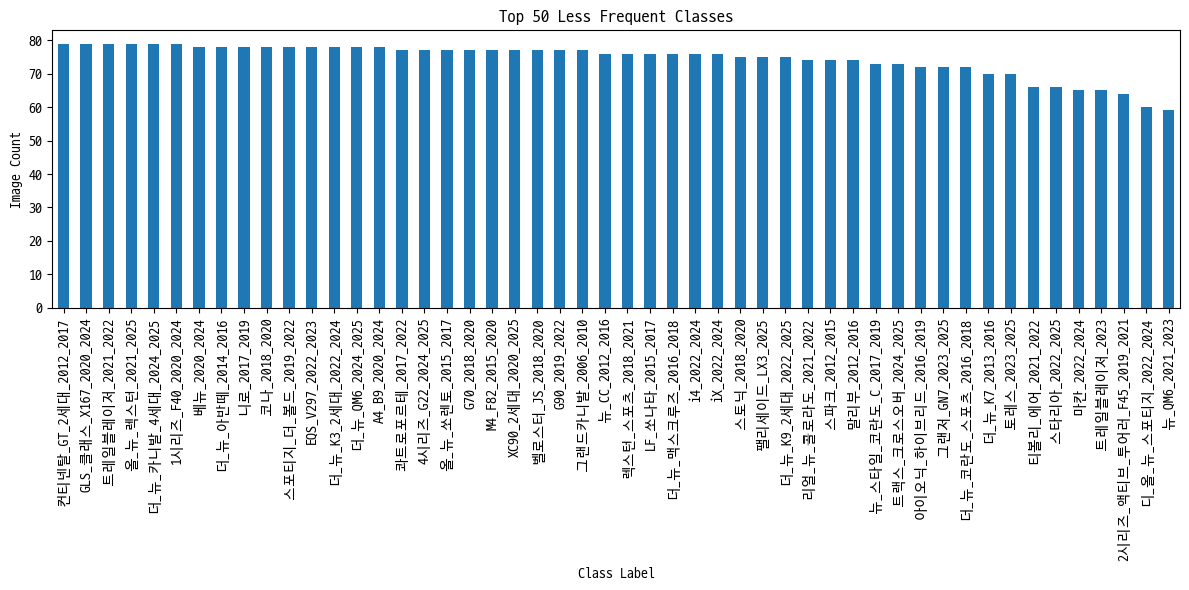

In [31]:
label_counts = df['label'].value_counts()

# 상위/하위 클래스 시각화
top_n = 50
fig, ax = plt.subplots(figsize=(12, 6))
label_counts.tail(top_n).plot(kind='bar', ax=ax)
ax.set_title(f'Top {top_n} Less Frequent Classes')
ax.set_ylabel('Image Count')
ax.set_xlabel('Class Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
data_frame_path = get_parent_path() / "data" /"train_csv" / "train_mapped.csv"
origin = pd.read_csv(data_frame_path)

In [18]:
train_df.head()

,image_path,image_name,folder_name,label,label_index
0,/Users/iyongjeong/WORK/dacon/img_clf/data/trai...,1시리즈_F20_2013_2015_0000.jpg,1시리즈_F20_2013_2015,1시리즈_F20_2013_2015,0
1,/Users/iyongjeong/WORK/dacon/img_clf/data/trai...,1시리즈_F20_2013_2015_0001.jpg,1시리즈_F20_2013_2015,1시리즈_F20_2013_2015,0
2,/Users/iyongjeong/WORK/dacon/img_clf/data/trai...,1시리즈_F20_2013_2015_0002.jpg,1시리즈_F20_2013_2015,1시리즈_F20_2013_2015,0
3,/Users/iyongjeong/WORK/dacon/img_clf/data/trai...,1시리즈_F20_2013_2015_0003.jpg,1시리즈_F20_2013_2015,1시리즈_F20_2013_2015,0
4,/Users/iyongjeong/WORK/dacon/img_clf/data/trai...,1시리즈_F20_2013_2015_0004.jpg,1시리즈_F20_2013_2015,1시리즈_F20_2013_2015,0


In [28]:
from sklearn.model_selection import train_test_split
import torch

df = origin.copy()
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label_index'], random_state=42)

unique_labels = sorted(df['label'].unique())
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

train_df['label_index'] = train_df['label'].map(label_to_index)
val_df['label_index'] = val_df['label'].map(label_to_index)

class_counts = train_df['label_index'].value_counts().sort_index()
print(class_counts)

total = class_counts.sum()

print(total)

class_weights = [total / c for c in class_counts]
print(class_weights)


label_index
0      69
1      66
2      63
3      69
4      70
       ..
386    66
387    60
388    64
389    72
390    69
Name: count, Length: 391, dtype: int64
26509
[np.float64(384.18840579710144), np.float64(401.6515151515151), np.float64(420.77777777777777), np.float64(384.18840579710144), np.float64(378.7), np.float64(519.7843137254902), np.float64(414.203125), np.float64(378.7), np.float64(378.7), np.float64(378.7), np.float64(378.7), np.float64(378.7), np.float64(378.7), np.float64(378.7), np.float64(395.65671641791045), np.float64(427.56451612903226), np.float64(414.203125), np.float64(401.6515151515151), np.float64(378.7), np.float64(378.7), np.float64(389.8382352941176), np.float64(384.18840579710144), np.float64(384.18840579710144), np.float64(378.7), np.float64(378.7), np.float64(196.36296296296297), np.float64(395.65671641791045), np.float64(378.7), np.float64(384.18840579710144), np.float64(378.7), np.float64(395.65671641791045), np.float64(389.8382352941176), np.float64(

In [ ]:
y_train = train_df['label_index'].values
num_clasees = len(np.unique(y_train))

In [39]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight='balanced', classes=np.arange(len(np.unique(train_df['label_index'].values))), y=train_df['label_index'].values)

In [41]:
print(len(class_weight))

391


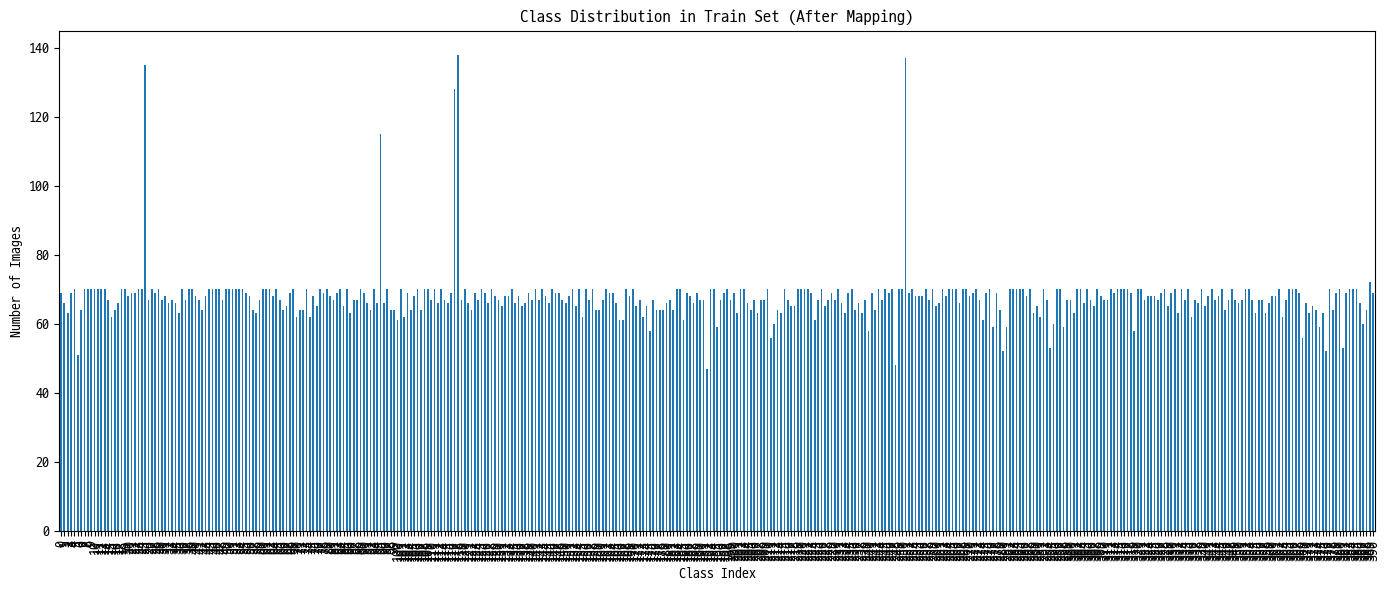

In [31]:
# 전체 클래스 분포 히스토그램
fig, ax = plt.subplots(figsize=(14, 6))
class_counts.plot(kind='bar', ax=ax)
ax.set_title('Class Distribution in Train Set (After Mapping)')
ax.set_xlabel('Class Index')
ax.set_ylabel('Number of Images')
plt.tight_layout()
plt.show()

In [32]:
min_class_index = class_counts.idxmin()
min_class_count = class_counts[min_class_index]

min_class_label = [label for label, idx in label_to_index.items() if idx == min_class_index]

(min_class_index, min_class_label, min_class_count)

(np.int64(192), ['뉴_QM6_2021_2023'], np.int64(47))